In [143]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo import Spotify, Recommender
from demo.lib import DB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
db = DB()

search_sp = Spotify()
search_sp.search()

mailbox_id = db.save_mailbox(search_sp.sel_tracks)
print("우체통 '{}'이 등록되었습니다.".format(mailbox_id))

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit
우체통 '628fa430dd98c58fdfae0197'이 등록되었습니다.


# Demo1. 편지작성

## 1. 객체 초기화

In [210]:
recommender = Recommender(mailbox_id)

## 2. 데이터 병합

In [211]:
print("총 {}개의 사용자 음악".format(recommender.user['tracks'].index.size))
recommender.user['tracks'].head()

총 2개의 사용자 음악


,trackId,trackName,artistIds,artistNames,image
0,1OQ3PoRZRtE7RH0NIh3p1O,Drawer,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273b22853...
1,67Yg0uYQB14o3gQ3RLwD7x,잊어야 한다는 마음으로,0Sr5L3iWPn0k6KnDr8RYS8,Kim Kwang Seok,https://i.scdn.co/image/ab67616d0000b273bf3902...


In [212]:
print("총 {}개의 추천 음악".format(recommender.reco['tracks'].index.size))
recommender.reco['tracks'].head()

총 182개의 추천 음악


,trackId,trackName,artistIds,artistName,image,seedId
0,5kRPPEWFJIMox5qIkQkiz5,Sweet Creature,6KImCVD70vtIoJWnq6nGn3,Harry Styles,https://i.scdn.co/image/ab67616d0000b2736c619c...,1OQ3PoRZRtE7RH0NIh3p1O
1,3DO8WRX72c1Z5hduVL1Nd5,선을 그어 주던가,71JjZRW0sCWpF1EuaS9TQA,1415,https://i.scdn.co/image/ab67616d0000b273f1c1c2...,1OQ3PoRZRtE7RH0NIh3p1O
2,4NYwy0R3NdvORX2B6OZXBT,Slow Motion,2iojnBLj0qIMiKPvVhLnsH,Trey Songz,https://i.scdn.co/image/ab67616d0000b273e04293...,1OQ3PoRZRtE7RH0NIh3p1O
3,4D3Wo2n0MuTT0DL0zKFGFI,There For You,4dvmLXorXADxVq8EcySEWk,Kim Na Young,https://i.scdn.co/image/ab67616d0000b2735655e9...,1OQ3PoRZRtE7RH0NIh3p1O
4,3SLlqKXr91haZQhhNYNuVk,Who Do You Love,6WeDO4GynFmK4OxwkBzMW8,The Black Skirts,https://i.scdn.co/image/ab67616d0000b27345543e...,1OQ3PoRZRtE7RH0NIh3p1O


In [213]:
recommender.merge()
print("총 {}개의 병합 음악".format(recommender.merged['tracks'].index.size))
recommender.merged['tracks'].head()

총 184개의 병합 음악


,trackId,trackName,artistIds,artistNames,image,artistName,seedId
0,1OQ3PoRZRtE7RH0NIh3p1O,Drawer,6zn0ihyAApAYV51zpXxdEp,10cm,https://i.scdn.co/image/ab67616d0000b273b22853...,NaN,NaN
1,67Yg0uYQB14o3gQ3RLwD7x,잊어야 한다는 마음으로,0Sr5L3iWPn0k6KnDr8RYS8,Kim Kwang Seok,https://i.scdn.co/image/ab67616d0000b273bf3902...,NaN,NaN
2,5kRPPEWFJIMox5qIkQkiz5,Sweet Creature,6KImCVD70vtIoJWnq6nGn3,NaN,https://i.scdn.co/image/ab67616d0000b2736c619c...,Harry Styles,1OQ3PoRZRtE7RH0NIh3p1O
3,3DO8WRX72c1Z5hduVL1Nd5,선을 그어 주던가,71JjZRW0sCWpF1EuaS9TQA,NaN,https://i.scdn.co/image/ab67616d0000b273f1c1c2...,1415,1OQ3PoRZRtE7RH0NIh3p1O
4,4NYwy0R3NdvORX2B6OZXBT,Slow Motion,2iojnBLj0qIMiKPvVhLnsH,NaN,https://i.scdn.co/image/ab67616d0000b273e04293...,Trey Songz,1OQ3PoRZRtE7RH0NIh3p1O


## 3. 데이터 전처리

In [232]:
recommender.data_preprocessing()

In [235]:
recommender.features['default'][:5, 1:]

array([[0.745, 0.359, 0.469, 0.0, 7, 0.101, -8.06, 0.0326, 84.366, 0.259],
       [0.542, 0.622, 0.188, 5.22e-05, 7, 0.076, -19.679, 0.0271,
        139.939, 0.146],
       [0.746, 0.427, 0.262, 0.0, 7, 0.068, -8.541, 0.0276, 104.085,
        0.228],
       [0.794, 0.68, 0.451, 0.0, 7, 0.0971, -8.76, 0.0329, 87.042, 0.371],
       [0.679, 0.733, 0.408, 3.92e-05, 7, 0.11, -7.834, 0.0388, 94.947,
        0.291]], dtype=object)

In [236]:
recommender.features['norm'][:5]

array([[0.7633157435604976, 0.20743919885550782, 0.4580245548058843, 0.0,
        0.6363636363636364, 0.07491774234371046, 0.7180848122961242,
        0.023400056385678034, 0.1546833942073327, 0.2064740923906935],
       [0.555320487901541, 0.5836909871244635, 0.1472182280721159,
        0.00014184782608695653, 0.6363636363636364, 0.04328018223234624,
        0.07568972189970696, 0.007893994925288977, 0.5614510214388709,
        0.07946498819826907],
       [0.7643403507312314, 0.3047210300429184, 0.2290675810197987, 0.0,
        0.6363636363636364, 0.033156162996709704, 0.6914911262232541,
        0.009303636876233439, 0.29901698860350895, 0.17163088681578062],
       [0.8135214949264528, 0.6666666666666667, 0.43811525273752905, 0.0,
        0.6363636363636364, 0.06998228296633764, 0.6793829822524464,
        0.024245841556244714, 0.17427042694754102, 0.3323592222097336],
       [0.6956916702920685, 0.742489270386266, 0.3905541422409025,
        0.00010652173913043477, 0.6363636363636

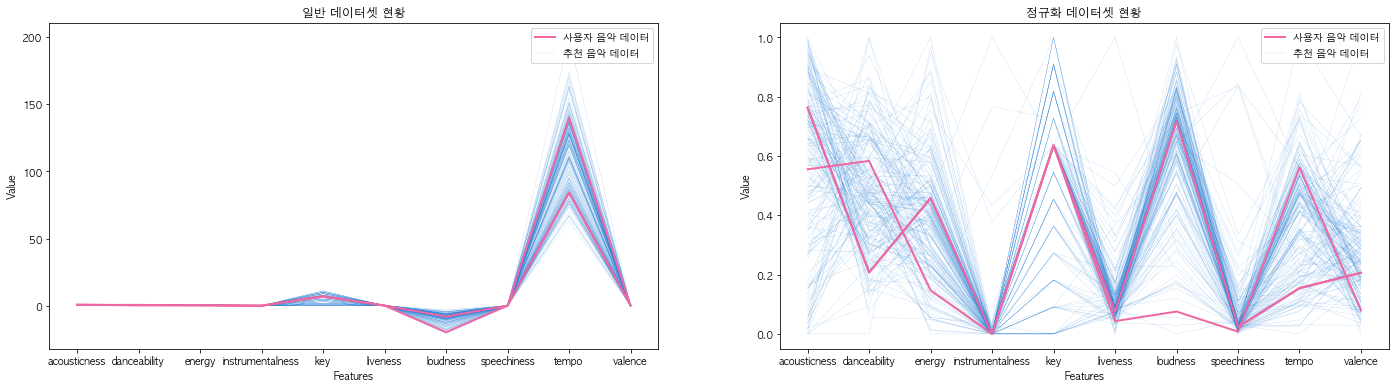

In [286]:
recommender.draw_dataset()